In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from random import randint

In [ ]:
import os
os.chdir('..')

from layer import Dense
from activation import ReLU, Softmax
from loss import SparseCategoricalCrossentropy
from model import Sequential
from optimizer import SGD

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1 ,1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 1), (10000, 1))

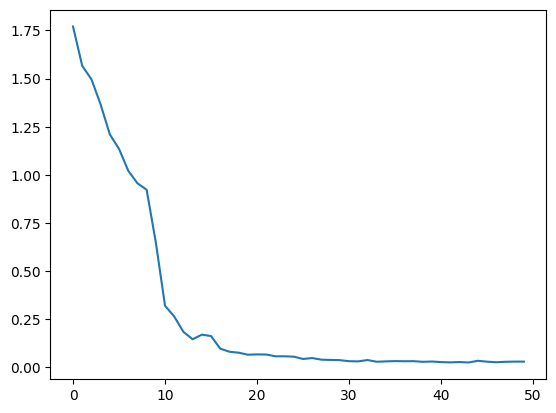

In [5]:
model = Sequential()
model.add(Dense(X_train.shape[1], 32, ReLU()))
model.add(Dense(32, 16, ReLU()))
model.add(Dense(16, 10, Softmax()))

optimizer = SGD(learning_rate=0.001)
loss_func = SparseCategoricalCrossentropy()

loss_history = []

batch_size = 32
for epoch in range(50):
    for i in range(0, len(X_train), batch_size):
        batch_features = X_train[i:i + batch_size]
        batch_labels = y_train[i:i + batch_size]

        batch_preds = model(batch_features)

        loss = loss_func.loss(batch_preds, batch_labels)
        grads = loss_func.derivative(batch_preds, batch_labels)

        model.backward(grads)

        optimizer.step(model)

    loss_history.append(loss)
    # print(f'Epoch {epoch + 1}, loss: {loss}')

plt.plot(loss_history)

<Axes: >

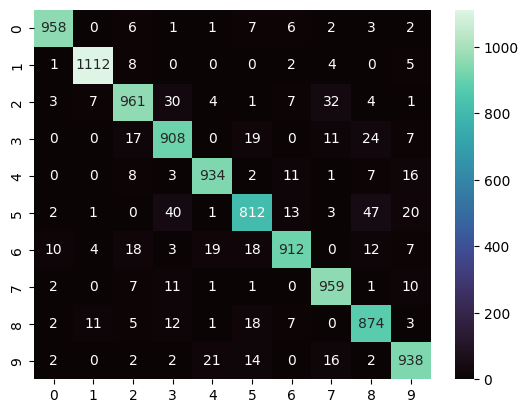

In [6]:
y_pred = np.argmax(model(X_test), axis=1)
sns.heatmap(confusion_matrix(y_pred, y_test), cmap='mako', annot=True, fmt='.0f')

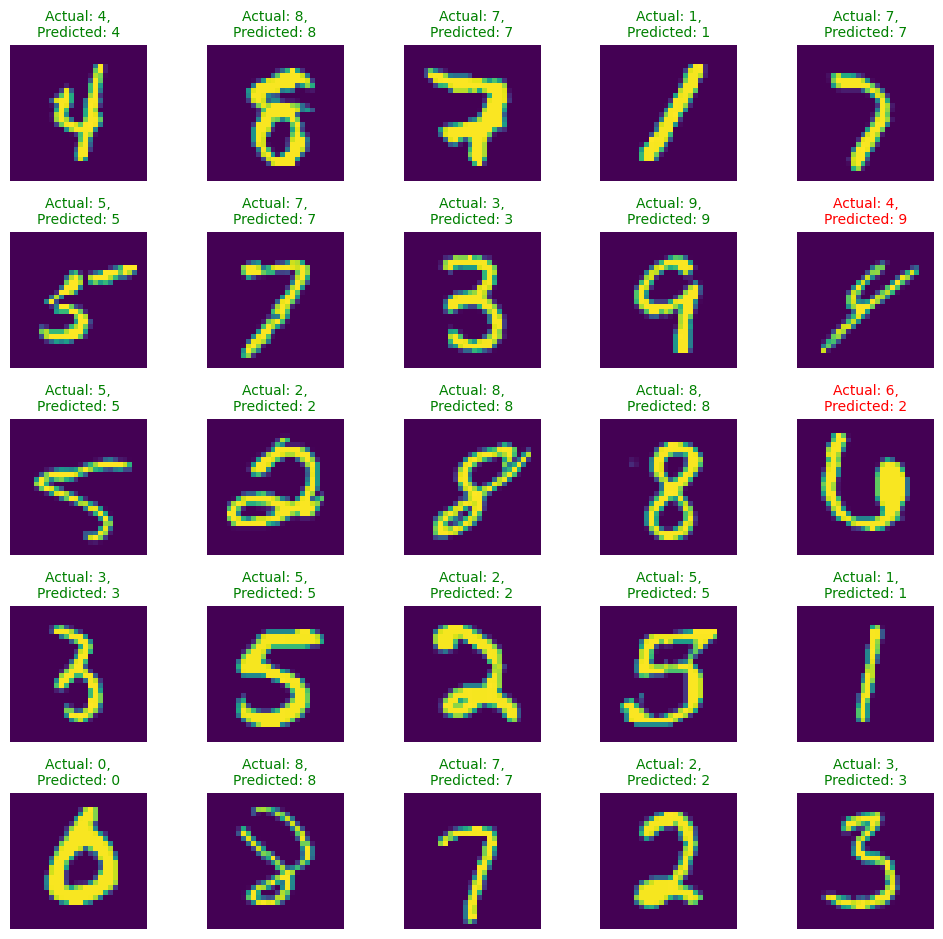

In [7]:
n = 5
fig, axes = plt.subplots(n, n, figsize=(2 * n, 2 * n))
axes = axes.flatten()

for i in range(n * n):
    idx = randint(0, len(X_test) - 1)
    axes[i].imshow(X_test[idx].reshape(28, 28))
    actual = y_test[idx, 0]
    predicted = y_pred[idx]
    axes[i].set_title(f'Actual: {actual},\nPredicted: {predicted}', fontsize=10, c='green' if actual == predicted else 'red')
    axes[i].set_axis_off()

fig.tight_layout(rect=[0, 0, 1, 0.95])